#Linear Regression

##Ordinary Least Squared Error

##1

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('dataset.csv')
print(dataset.shape)
dataset.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
# initializing our inputs and outputs
X = dataset['Head Size(cm^3)'].values
Y = dataset['Brain Weight(grams)'].values
# mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)
#total number of values
n = len(X)
# using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)
#printing the coefficient
print(b1, b0)

0.26342933948939945 325.57342104944223


In [6]:
from functools import reduce
a=reduce(lambda acc,curr:acc+(curr[0]-x_mean)*(curr[1]-y_mean),zip(X.tolist(),Y.tolist()),0)/reduce(lambda acc,curr:acc+(curr-x_mean)**2,X.tolist(),0)
b=y_mean - a*x_mean
a,b

(0.26342933948939945, 325.57342104944223)

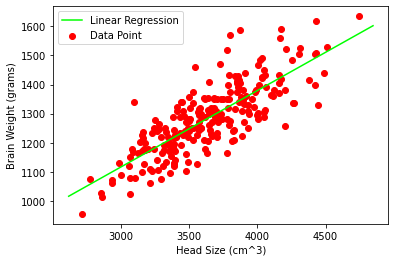

In [7]:
#plotting values 
x_max = np.max(X) + 100
x_min = np.min(X) - 100
#calculating line values of x and y
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x
#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')
#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')
# x-axis label
plt.xlabel('Head Size (cm^3)')
#y-axis label
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()


In [8]:
#rmse 
rmse=np.sqrt(reduce(lambda acc,curr:acc+(curr[1]-(a*curr[0]+b))**2,zip(X.tolist(),Y.tolist()),0)/n)
rmse

72.1206213783709

In [11]:
rmse = 0
for i in range(n):
    y_pred=  b0 + b1* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print(rmse)

72.1206213783709


In [10]:
r2=reduce(lambda acc,curr:acc+(a*curr+b-y_mean)**2,X.tolist(),0)/reduce(lambda acc,curr:acc+(curr-y_mean)**2,Y.tolist(),0)
r2

0.6393117199570001

In [ ]:
sumofsquares = 0
sumofresiduals = 0
for i in range(n) :
    y_pred = b0 + b1 * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

##Gradient-descent

#K Means